#### Copyright 2020 Google LLC.

In [80]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Linear Regression With `scikit-learn`

We have learned about linear regression in theory. Now let's put our newly-acquired skills into practice! In this Colab we will create multiple linear regression models using the scikit-learn toolkit.

# Creating a Dataset

In this Colab we will explore different methods of applying linear regression to a dataset. If the dataset is small enough, the coefficients of a linear regression can be calculated via a simple equation. If the dataset is large, we need to use computing algorithms such as sampling and batching to calculate the coefficients.

But before we get started, let's create some sample data to perform our regression on. The code below creates 1000 data points. The x-coordinates are called `coffee`, and the y-coordinates are called `energy`. So this regression is trying to predict a person's energy based on coffee intake.

In [81]:
import numpy as np

np.random.seed(213)

# The size of the dataset that we'll be using to perform our linear regression.
DATA_SET_SIZE = 1000

# The maximum value of the x coordinate. The range of values of X will be
# (0, X_MAX).
X_MAX = 5

# The y-intercept and slope are values that we'll be trying to predict via
# linear regression.
INTERCEPT = 4
SLOPE = 3

# Generate the x-coordinates (coffee intake) for our dataset.
coffee = X_MAX * np.random.rand(DATA_SET_SIZE, 1)

# Generate the y-coordinates (energy level) for our dataset using the linear
# equation y = mx + b.
energy = SLOPE * coffee + INTERCEPT

Let's take a look at the dataset that was just generated.

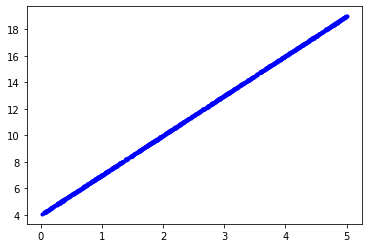

In [82]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(coffee, energy, 'b.')
plt.show()

The dataset does indeed have an $x$ range from 0 to the max $x$-value of 5. Notice that the $y$-intercept and slope match our seeded values.

This dataset looks nothing like what we'd see in the real world, though. It would be trivial to fit a line to the data as is; the data is already a straight line. Let's add a little randomness to the data to make it more realistic.

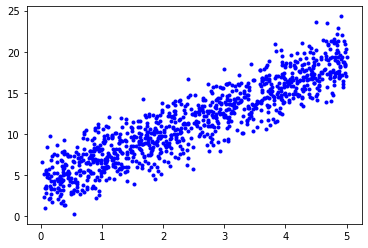

In [83]:
energy = energy + 2 * np.random.randn(DATA_SET_SIZE, 1)

plt.plot(coffee, energy, 'b.')
plt.show()

That's much better! There is still a linear trend to the data, but there is much more noise.

# Running the Regression

scikit-learn performs linear regression in its `LinearRegression` module.

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(coffee, energy)
lin_reg.coef_, lin_reg.intercept_

(array([[3.0263932]]), array([3.90939913]))

Not bad! The random noise we added to the data prevented us from exactly predicting the slope and intercept, but our calculations were pretty close.

We can use this slope and intercept to predict new $y$-values given some $x$-values.

In [85]:
coffee_ = np.array([[0.34], [1.65], [2.45], [3.78], [4.56]])

energy_predict = lin_reg.predict(coffee_)
energy_predict

array([[ 4.93837282],
       [ 8.90294791],
       [11.32406248],
       [15.34916544],
       [17.70975213]])

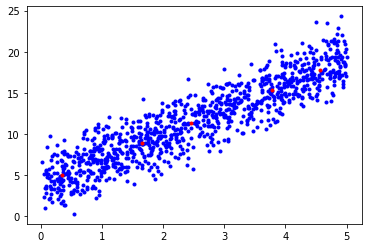

In [86]:
plt.plot(coffee, energy, 'b.')
plt.plot(coffee_, energy_predict, 'r.')
plt.show()

And we can use two extreme $x$-values 0 and `X_MAX` to draw the regression line.

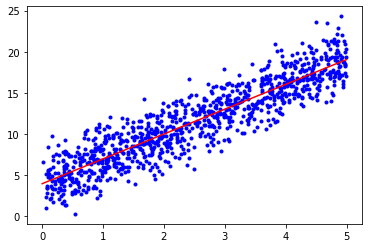

In [87]:
coffee_ = np.array([[0.0], [X_MAX]])
energy_predict = lin_reg.predict(coffee_)

plt.plot(coffee, energy, 'b.')
plt.plot(coffee_, energy_predict, 'r-')
plt.show()

# Stochastic Gradient Descent

It is not always practical to run a linear regression using the entire training data set. For cases where training using the entire set is impractical, the stochastic gradient descent method can be used. In scikit-learn this is implemented via the `SGDRegressor`.

In [88]:
from sklearn.linear_model import SGDRegressor

# Create a new Stochastic Gradient Descent regressor.
sgd_reg = SGDRegressor()

# Fit the model.
sgd_reg.fit(coffee, energy.ravel())

# Display the slope and intercept.
sgd_reg.coef_, sgd_reg.intercept_

(array([3.09924724]), array([3.88926376]))

You might notice that the slope and intercept aren't as accurate as what we were getting when processing the entire dataset. This is because the SGDRegressor is only using a subset of the training data.

Let's compare the regression lines calculated by the full linear regressor and the SGD one.

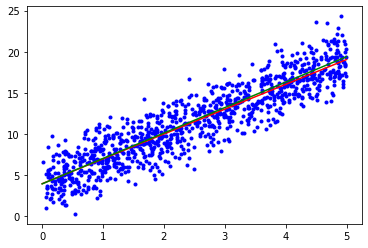

In [89]:
coffee_ = np.array([[0.0], [5.0]])

lin_predict = lin_reg.predict(coffee_)
sgd_predict = sgd_reg.predict(coffee_)

plt.plot(coffee, energy, 'b.')
plt.plot(coffee_, lin_predict, 'r-')
plt.plot(coffee_, sgd_predict, 'g-')
plt.show()

It might be hard to see, but the red and green lines are *almost* the same but not quite.

### Challenge: Regressor Parameters

The SGDRegressor has many parameters that can be tuned. Out of the box, our regressor didn't do that well. Let's see if we can tune some of the parameters of the regressor to get its predicted values for the slope and intercept closer to those we predicted using the entire dataset.

Check out the [SGDRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) and look over the parameters available. Pay special attention to parameters related to learning rate and iterations over the data. See if you can tweak the parameters to get within some threshold `EPISLON` of the calculated values below.

In [90]:
import numpy as np
from sklearn.linear_model import SGDRegressor

np.random.seed(21)

# Initialize the dataset attributes.
DATA_SET_SIZE = 1000
X_MAX = 5
INTERCEPT = 4
SLOPE = 3

# Generate the randomized dataset.
coffee = X_MAX * np.random.rand(DATA_SET_SIZE, 1)
energy = SLOPE * coffee + INTERCEPT + 2 * np.random.randn(DATA_SET_SIZE, 1)

sgd_reg = SGDRegressor(
    # TODO(you): Update the parameters to SGDRegressor.
    n_iter_no_change = 10
    )

# Fit the model.
sgd_reg.fit(coffee, energy.ravel())

EPSILON = 0.05

print(sgd_reg.coef_, sgd_reg.intercept_)
if abs(SLOPE - sgd_reg.coef_) < EPSILON and abs(INTERCEPT - sgd_reg.intercept_) < EPSILON:
  print("You win!")
else:
  print("Try again :(")

[3.02074997] [3.99488753]
You win!


---

# Optional: The Normal Equation

If the dataset being processed is small enough, then the slope and $y$-intercept of the regression line can be calculated in-memory exactly. The matrix normal equation can easily be written in NumPy, as seen below.

In [91]:
# x is an Nx1 matrix containing our x-values. The first step in calculating the
# normal equation is to create an Nx2 matrix where each "row" has the value 1
# and the x value.
coffee_ = np.c_[np.ones((DATA_SET_SIZE, 1)), coffee]

norm = np.linalg.inv(coffee_.T.dot(coffee_)).dot(coffee_.T).dot(energy)

calculated_intercept = norm[0][0]
calculated_slope = norm[1][0]

print("Calculated slope {} vs actual {}".format(calculated_slope, SLOPE))
print("Calculated intercept {} vs actual {}".format(calculated_intercept,
                                                    INTERCEPT))

Calculated slope 2.9912319026307017 vs actual 3
Calculated intercept 3.9871540868029376 vs actual 4


Notice that these values are the same as scikit-learn calculated above.

We can now use these values to make predictions.

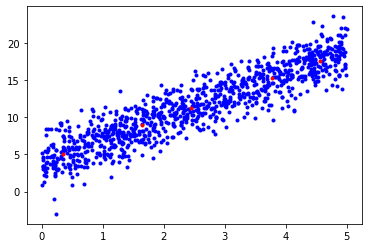

In [92]:
# Create a (5,1) matrix containing values to make predictions on.
coffee_ = np.array([[0.34], [1.65], [2.45], [3.78], [4.56]])

# Convert the matrix to a (5, 2) matrix with ones in the first column
# in order to perform a dot-product against the calculated slope and
# intercept.
coffee_predict = np.c_[np.ones((5, 1)), coffee_]

# Make the predictions.
energy_predict = coffee_predict.dot(norm)

# Plot the original data as blue dots.
plt.plot(coffee, energy, 'b.')

# Plot the predictions as red dots.
plt.plot(coffee_, energy_predict, 'r.')
plt.show()

To plot the calculated line as we did for the scikit-learn regression, we can just plug in 0 and 5 (`X_MAX`) to the equation.

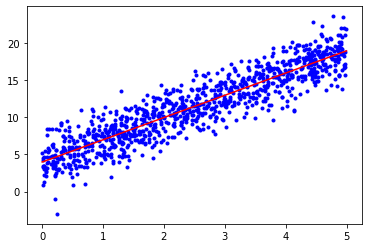

In [93]:
coffee_ = np.array([[0.0], [X_MAX]])
coffee_predict = np.c_[np.ones((2,1)), coffee_]
energy_predict = coffee_predict.dot(norm)

plt.plot(coffee, energy, 'b.')
plt.plot(coffee_, energy_predict, 'r-')
plt.show()

### Challenge: Pseudoinverse

It turns out that the math operations used to calculate the Normal Equation are quite expensive. We'll explore other methods of performing a linear regression soon, but there is a purely mathematical optimization that has been discovered. The equation uses the **pseudoinverse** of the input matrix to predict $y$.

Find the NumPy function that calculates the pseudoinverse of a matrix, and then use that function to write a more optimal method for finding the slope and intercept for a linear regression.

In [94]:
import numpy as np

np.random.seed(21)

# Initialize the dataset attributes.
DATA_SET_SIZE = 1000
X_MAX = 5
INTERCEPT = 4
SLOPE = 3

# Generate the dataset.
coffee = X_MAX * np.random.rand(DATA_SET_SIZE, 1)
energy = SLOPE * coffee + INTERCEPT

# Create the matrix.
coffee_ = np.c_[np.ones((DATA_SET_SIZE, 1)), coffee]

#norm2 = [[0], [0]] # TODO(you): Update this line to perform an in-memory 
                   # calculation of a linear regression using the optimized 
                   # pseudoinverse equation in the place of the [[0], [0]]
                   # matrix.

norm2 = np.linalg.inv(coffee_.T.dot(coffee_)).dot(coffee_.T).dot(energy)


calculated_intercept2 = norm2[0][0] 
calculated_slope2 = norm2[1][0]

EPSILON = 0.00001

if (abs(SLOPE - calculated_slope2) < EPSILON and
    (abs(INTERCEPT - calculated_intercept2)) < EPSILON):
  print("You win!")
else:
  print("Try again :(")

You win!


---

# Exercises

For these exercises, we will download a CSV of life expectancies from [GapMinder](https://www.gapminder.org/data/) and create a linear regression predicting life expectancy in the United States.

## Exercise 1: Obtain the Data

Download a CSV of life expectancy data from [GapMinder](https://www.gapminder.org/data/), upload it to this Colab, and read the data into memory using Pandas.

Examine the data using describe.

### Student Solution

In [95]:
import pandas as pd

# documentation from where I got the csv file
# https://www.gapminder.org/data/documentation/gd004/

# I clicked on the link to GapMinder and typed "Life Expectancy"
# and clicked on the first option that popped up 

life_expectancy_df = pd.read_csv('life_expectancy_years.csv')
life_expectancy_df.describe()

,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.00000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.00000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,31.503763,31.463441,31.480108,31.385484,31.460753,31.586559,31.644086,31.598387,31.385484,31.313441,31.542473,31.499462,31.488710,31.483871,31.536022,31.677957,31.655914,31.757527,31.599462,31.505914,31.584409,31.648925,31.759140,31.81129,31.744624,31.697849,31.623118,31.662366,31.601613,31.583871,31.669892,31.632258,31.593548,31.589247,31.575269,31.707527,31.671505,31.605914,31.670968,31.661290,...,80.049462,80.184409,80.320968,80.448925,80.58172,80.710215,80.844086,80.973656,81.097849,81.234409,81.353226,81.488710,81.616129,81.744624,81.867742,81.995699,82.122581,82.247312,82.366667,82.494086,82.616129,82.738710,82.865591,82.986559,83.112366,83.228495,83.352688,83.472581,83.596774,83.712903,83.838172,83.956452,84.075806,84.198387,84.316129,84.437097,84.557527,84.672043,84.789247,84.908602
std,3.809510,3.801217,3.932344,3.955872,3.928388,4.003874,4.102694,3.974506,4.080230,4.033412,3.870885,3.790137,3.892381,3.803833,3.858125,4.126251,4.107132,4.319994,4.637713,4.640494,4.543344,4.042601,4.279966,4.38361,4.213209,4.166701,4.081806,4.181657,3.990319,3.940402,4.057473,4.000666,4.010953,4.114220,3.927523,4.170002,4.141784,4.035252,4.060078,4.119211,...,5.865117,5.859575,5.849134,5.838125,5.83501,5.825160,5.817717,5.811024,5.803279,5.791989,5.788583,5.776816,5.766366,5.760790,5.754963,5.746678,5.739566,5.727357,5.722357,5.716720,5.703906,5.703513,5.693790,5.683830,5.670141,5.667431,5.659216,5.648281,5.644101,5.633255,5.626126,5.619607,5.614047,5.602427,5.595525,5.590510,5.581201,5.574427,5.564646,5.557097
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,23.400000,23.400000,23.000000,23.400000,23.400000,23.400000,23.400000,23.400000,5.500000,1.500000,6.500000,23.400000,23.400000,23.40000,23.400000,23.400000,23.400000,23.400000,23.400000,23.400000,23.400000,23.400000,23.000000,20.400000,23.400000,23.400000,23.400000,23.400000,23.400000,23.400000,...,63.200000,63.400000,63.500000,63.700000,63.80000,64.000000,64.100000,64.300000,64.400000,64.500000,64.700000,64.800000,64.900000,65.100000,65.200000,65.300000,65.500000,65.600000,65.700000,65.800000,66.000000,66.100000,66.200000,66.300000,66.500000,66.600000,66.700000,66.800000,66.900000,67.000000,67.100000,67.300000,67.400000,67.500000,67.600000,67.700000,67.800000,67.900000,68.000000,68.100000
25%,29.025000,28.925000,28.900000,28.900000,28.925000,29.025000,29.025000,29.025000,28.925000,28.825000,29.025000,29.025000,29.025000,29.025000,29.025000,29.025000,29.025000,29.025000,29.025000,29.025000,29.050000,29.050000,29.050000,29.05000,29.050000,29.050000,28.925000,28.925000,28.925000,29.050000,29.050000,29.050000,29.050000,29.050000,29.050000,28.925000,29.05000

---

## Exercise 2: Inspect the Data

Examine the data using head and/or tail.

### Student Solution

In [96]:
life_expectancy_df.head(10)
#life_expectancy_df.tail(10)

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.8,27.8,27.8,...,72.4,72.5,72.7,72.8,72.9,73.1,73.2,73.3,73.5,73.6,73.7,73.9,74.0,74.2,74.3,74.4,74.6,74.7,74.8,75.0,75.1,75.2,75.4,75.5,75.6,75.8,75.9,76.0,76.2,76.3,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,74.8,74.9,75.0,75.2,75.3,75.5,75.6,75.7,75.9,76.0,76.2,76.3,76.4,76.5,76.7,76.8,77.0,77.1,77.2,77.3,77.5,77.6,77.7,77.8,78.0,78.1,78.2,78.4,78.5,78.6,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,84.2,84.3,84.5,84.6,84.7,84.8,84.9,85.0,85.1,85.2,85.3,85.4,85.5,85.7,85.8,85.8,86.0,86.0,86.2,86.3,86.4,86.5,86.6,86.7,86.8,86.9,87.0,87.1,87.2,87.3,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,79.0,79.2,79.3,79.4,79.5,79.6,79.7,79.8,79.9,80.0,80.1,80.3,80.3,80.5,80.6,80.7,80.8,80.8,81.0,81.0,81.1,81.2,81.3,81.4,81.5,81.6,81.7,81.8,81.9,82.0,82.1,82.2,82.3,82.4,82.5,82.6,82.7,82.8,82.9,83.0
5,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,83.1,83.3,83.4,83.5,83.7,83.8,83.9,84.0,84.2,84.3,84.4,84.5,84.6,84.8,84.9,85.0,85.1,85.2,85.3,85.4,85.5,85.7,85.8,85.9,86.0,86.1,86.2,86.3,86.4,86.5,86.7,86.8,86.9,87.0,87.1,87.2,87.3,87.4,87.5,87.6
6,Armenia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,81.6,81.7,81.9,82.0,82.1,82.3,82.4,82.5,82.7,82.8,82.9,83.0,83.2,83.3,83.4,83.6,83.7,83.8,84.0,84.1,84.2,84.3,84.4,84.6,84.7,84.8,84.9,85.0,85.2,85.3,85.4,85.5,85.6,85.7,85.8,85.9,86.0,86.2,86.3,86.4
7,Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,82.7,82.8,82.9,83.0,83.2,83.3,83.4,83.5,83.7,83.8,83.9,84.0,84.1,84.3,84.4,84.5,84.6,84.7,84.8,84.9,85.0,85.2,85.3,85.4,85.5,85.6,85.7,85.8,85.9,86.0,86.1,86.2,86.3,86.4,86.5,86.6,86.7,86.8,86.9,87.0
8,Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,87.7,87.8,87.9,88.0,88.1,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.2,89.3,89.4,89.5,89.6,89.7,89.8,89.9,90.0,90.2,90.3,90.4,90.5,90.6,90.7,90.8,90.9,91.0,91.

---

## Exercise 3: Preprocess Life Expectancy Column

Extract the life expectancy values for the United States into a NumPy array. 

To do this you'll need to find the row that contains data for the United States. When you find that row of data, you'll find the word 'United States' in the first column and then floating point numbers in subsequent columns. The goal of this step is to create a NumPy array containing those numbers, but excluding the first column with the title 'United States'.

### Student Solution

In [97]:
import numpy as np

index_df = life_expectancy_df.loc[life_expectancy_df['country'] == 'United States']
index_df.reset_index(inplace=True)
index_value = index_df.iloc[0,0]

life_expectancy = np.array(life_expectancy_df.iloc[index_value][1:])

targets = life_expectancy
targets

array([39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4,
       39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4,
       39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4,
       39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4,
       39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4,
       39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 38.0, 34.5, 34.0, 31.0, 38.0,
       39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4,
       39.4, 39.4, 39.4, 39.4, 40.0, 40.6, 41.2, 41.7, 42.3, 42.9, 43.5,
       44.1, 44.6, 45.2, 45.6, 46.0, 46.3, 46.7, 47.1, 47.5, 47.8, 48.2,
       48.6, 49.0, 49.3, 50.5, 50.6, 49.6, 50.3, 50.1, 50.2, 51.9, 52.8,
       51.8, 53.4, 54.1, 53.5, 54.6, 55.1, 54.2, 54.0, 47.2, 55.3, 55.4,
       58.3, 58.1, 57.5, 58.5, 58.5, 58.0, 59.5, 58.4, 58.5, 59.7, 60.4,
       61.1, 61.0, 60.4, 61.0, 60.5, 61.2, 62.5, 63.2, 63.4, 63.9, 64.7,
       64.4, 65.2, 65.7, 66.4, 66.8, 67.4, 67.8, 68

---

## Exercise 4: Create Yearly Data

Now we need to create an array of year data from the minimum to the maximum year in the dataset. There are a few ways that this can be done.

The column names (except column 0) are the years. You can extract those years into an array, similarly to what you did for life expectancy. Note that the column names are strings, so you'll want to convert them into integers.

If no years are missing from the dataset, you can also just use a range function to generate numbers between the min and max years.

### Student Solution

In [98]:
years = np.array([int(i) for i in index_df.columns[2:]])
features = years
features

array([1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
       1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820,
       1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831,
       1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842,
       1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853,
       1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864,
       1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875,
       1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886,
       1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897,
       1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908,
       1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
       1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 19

---

## Exercise 5: Plot the Data

Create a scatterplot of the data.

### Student Solution

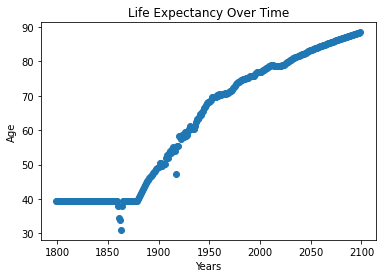

In [99]:
import matplotlib.pyplot as plt

plt.scatter(features, targets)
plt.title('Life Expectancy Over Time')
plt.xlabel('Years')
plt.ylabel('Age')
plt.show()

---

## Exercise 6: Subset the Data

Split off 20% of the data as a test set, and keep the rest for training.

To do this it will be useful to create a `DataFrame` and store the years and life expectancy arrays created above as columns in that dataframe.

You can then randomize and split the dataframe, or use scikit-learn's built in test/train data splitter.

### Student Solution

In [100]:
from sklearn.model_selection import train_test_split

usa_df = pd.DataFrame({
  'Life Expectancy' : targets,
  'Years' : features                                   
})

usa_sub_data = train_test_split(usa_df, test_size=0.2, train_size=0.8)

usa_sub_data

[    Life Expectancy  Years
 5              39.4   1804
 171            71.3   1970
 182            74.6   1981
 249              83   2048
 256            83.9   2055
 ..              ...    ...
 160              70   1959
 216            78.6   2015
 296            88.1   2095
 56             39.4   1855
 173            71.8   1972
 
 [240 rows x 2 columns],     Life Expectancy  Years
 272            85.7   2071
 168            70.5   1967
 100              49   1899
 44             39.4   1843
 27             39.4   1826
 ..              ...    ...
 142            64.7   1941
 157            69.6   1956
 265            84.9   2064
 228            79.7   2027
 57             39.4   1856
 
 [61 rows x 2 columns]]

---

## Exercise 7: Train a Model

Use `LinearRegression` in scikit-learn to create a model.

### Student Solution

In [101]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
# regression.fit(features, targets)
regression.fit(usa_sub_data[0][['Years']], usa_sub_data[0]['Life Expectancy'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

---

## Exercise 8: Test Your Model

Use the test data you put aside to make predictions of life expectancy based on year. Compare the predictions to the actual data by using scikit-learn to calculate the root mean squared error.

### Student Solution

In [102]:
from sklearn.metrics import mean_squared_error

# regression.fit(features)
predictions = regression.predict(usa_sub_data[1][['Years']])

# MSE(targets, predictions)
mean_squared_error(usa_sub_data[1]['Life Expectancy'], predictions, squared=False)

4.4887894068870855

---

## Exercise 9: Plot Your Regression

Create a scatter plot of the full set of life expectancy data. Draw your regression line over the scatterplot.

### Student Solution

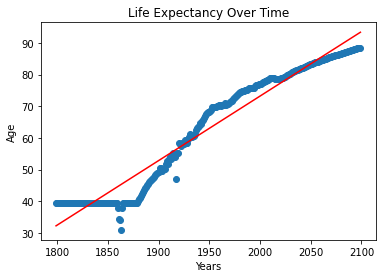

In [103]:
import matplotlib.pyplot as plt

# [[x_min], [x_max]] needed for regression line
x_values = [[features.min()], [features.max()]]

predicted_y_values = regression.predict(x_values)

plt.scatter(features, targets)
plt.title('Life Expectancy Over Time')
plt.xlabel('Years')
plt.ylabel('Age')

plt.plot(x_values,predicted_y_values, 'r-')
plt.show()

---

## Challenge

The [CalCOFI dataset](https://www.kaggle.com/sohier/calcofi/version/2) contains decades of oceanic data. In this exercise, we will use this data to attempt to predict water temperature based on salinity. The exercise is divided into multiple steps, each with a code block after it for your solution.

### Student Solution

**Acquire the data**

The [CalCOFI data](https://www.kaggle.com/sohier/calcofi/version/2) consists of two files, one containing data about *Casts* and the other about *Bottles*. Look at the data files and try to get an understanding of what a cast is and what a bottle is.

Find the file that contains temperature and salinity information, download that file, and then upload it to Colab. You'll want to use the zipped version of the file, so that the upload doesn't take too long.

Once the file is uploaded, use Python to unzip the file.

In [104]:
import zipfile
import os

# checks the contents of the zip file
with zipfile.ZipFile('archive.zip','r') as z:
  z.extractall('./')

os.listdir()

['.config',
 'bottle.csv',
 'cast.csv',
 'life_expectancy_years.csv',
 'archive.zip',
 '.ipynb_checkpoints',
 'sample_data']

**Load the data using Pandas**

Now that you have an unzipped version of the file, you can load the data into memory using Pandas. Write code to read the file into memory and describe the data table that you created.

In [105]:
bottle_df = pd.read_csv('bottle.csv')

bottle_df.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

**Drop rows with missing data**

Looking at the counts for temperature and salinity, you can see that there are some rows with missing data. Remove the rows with missing temperature or salinity data from the dataframe. After you are done, describe the data to make sure that every temperature and salinity row contains data.

In [106]:
# Check for missing data
#print(bottle_df['Salnty'].isna().any())
#print(bottle_df['T_degC'].isna().any())

# Remove rows with missing data
# df = df.dropna(pass as a list the columns of rows you want to drop)

missing_values_df = bottle_df[bottle_df['Salnty'].isna()]

bottle_df.drop(missing_values_df.index, inplace=True)

missing_values_df = bottle_df[bottle_df['T_degC'].isna()]

bottle_df.drop(missing_values_df.index, inplace=True)

# Check for missing data
#print(bottle_df['Salnty'].isna().any())
#print(bottle_df['T_degC'].isna().any())

bottle_df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,661489.000000,812174.000000,661274.000000,661268.000000,118613.000000,814247.000000,814247.000000,12146.000000,814247.000000,27523.000000,623580.000000,168602.000000,15207.000000,167181.000000,221670.000000,592152.000000,221670.000000,592155.000000,393383.000000,421053.000000,348465.000000,465860.000000,332972.000000,483460.000000,332011.000000,484679.000000,64959.000000,757686.000000,12801.000000,11129.000000,799620.000000,12803.000000,11131.000000,799618.000000,19965.000000,17773.000000,792508.000000,19966.000000,17773.000000,792507.000000,15951.000000,814247.000000,814247.000000,813269.000000,814247.000000,812007.000000,812092.000000,808795.000000,661489.000000,659854.000000,348473.000000,393391.000000,332019.000000,332980.000000,64979.000000,221674.000000,221674.000000,814247.000000,121950.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17762.765357,447576.396957,221.936839,10.860287,33.841337,3.416704,25.819394,57.103779,148.808694,10.494381,4.692909,2.017043,6.091717,2.719339,6.129928,8.999995,8.733325,6.692970,8.730962,0.433285,8.999836,0.190445,8.999831,1.550656,8.999392,26.662741,8.999691,0.042165,8.995030,17.356644,8.992541,0.084873,8.944172,9.572072,1.276665,8.999991,9.600634,1.278052,8.999991,0.150793,1.992911,8.999991,8.255856,1.268103,8.999991,16.592767,221.937416,10.860309,10.839803,33.841282,25.811010,220.938918,0.433496,3.416736,57.131372,26.663020,1.550645,17.356583,0.042185,0.084847,0.433326,0.190492,223.428334,162.049774,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10087.133276,245987.422274,308.657488,4.224930,0.461636,2.068723,1.167787,37.094137,90.187533,6.187671,1.870415,0.148013,0.418374,0.449322,0.492933,0.003799,0.844791,1.146895,1.009949,1.159416,0.012798,0.344539,0.012994,1.031308,0.025596,27.683091,0.018760,0.103923,0.080988,14.598134,0.137279,0.273066,0.525379,24.138452,0.447369,0.002959,25.385776,0.448059,0.002959,0.227789,0.083902,0.002972,21.747567,0.442984,0.002972,29.173888,308.657223,4.224934,4.239330,0.462775,1.124645,93.483703,0.383012,2.068738,37.090402,27.683305,1.031315,14.598174,0.103927,0.273027,1.159413,0.344535,311.960419,85.732834,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.000000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,9228.000000,240986.500000,46.000000,7.750000,33.489000,1.400000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,6.000000,9.000000,0.050000,9.000000,0.050000,9.000000,0.450000,9.000000,3.140000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.880000,1.000000,9.000000,0.880000,1.000000,9.000000,0.050000,2.000000,9.000000,0.938500,1.000000,9.000000,0.190000,46.000000,7.750000,7.730000,33.489000,24.960000,143.700000,0.136000,1.400000,21.100000,3.100000,0.450000,0.600000,0.000000,0.00

**Plot the data**

Create a scatterplot of salinity and temperature.

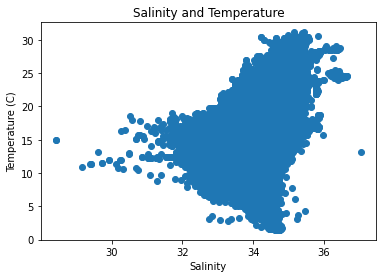

In [107]:
import matplotlib.pyplot as plt

plt.scatter(bottle_df['Salnty'], bottle_df['T_degC'])
plt.title('Salinity and Temperature')
plt.xlabel('Salinity')
plt.ylabel('Temperature (C)')
plt.show()

**Shuffle the data**

In this exercise, we will split the data into a training set and a test set. Since the data is ordered, we need to shuffle the dataframe before splitting it. Write code to shuffle the dataframe, and look at the data (using `head`, `tail`, or some other means) to make sure that it is shuffled.

In [108]:
from sklearn.model_selection import train_test_split
import numpy as np

# # shuffles and splits the data
sub_data = train_test_split(bottle_df, test_size=0.2, train_size=0.8)

#usa_sub_data = train_test_split(usa_df, test_size=0.2, train_size=0.8)
print(sub_data[0], sub_data[1])

        Cst_Cnt  Btl_Cnt       Sta_ID  ... pH2  pH1  DIC Quality Comment
238142     9103   238143  156.7 020.0  ... NaN  NaN                  NaN
312144    11884   312145  103.3 060.0  ... NaN  NaN                  NaN
324224    12308   324225  090.0 160.0  ... NaN  NaN                  NaN
36742      1187    36743  100.0 110.0  ... NaN  NaN                  NaN
533961    21582   533962  120.0 045.0  ... NaN  NaN                  NaN
...         ...      ...          ...  ...  ..  ...                  ...
310410    11823   310411  090.0 045.0  ... NaN  NaN                  NaN
203816     7791   203817  126.7 239.0  ... NaN  NaN                  NaN
560507    22779   560508  080.0 070.0  ... NaN  NaN                  NaN
265170    10195   265171  086.7 055.0  ... NaN  NaN                  NaN
146643     5531   146644  096.7 080.0  ... NaN  NaN                  NaN

[651397 rows x 74 columns]         Cst_Cnt  Btl_Cnt       Sta_ID  ... pH2  pH1  DIC Quality Comment
230415     8793   23041

**Split the data into train/test**

For this exercise we'll split the data frame so that 20% of the data is held out for testing, and the remaining data is used for training. Write code to split the data into two dataframes: one for testing and one for training.

In [109]:
# already shuffled and split in the code box above
sub_data

[        Cst_Cnt  Btl_Cnt       Sta_ID  ... pH2  pH1  DIC Quality Comment
 238142     9103   238143  156.7 020.0  ... NaN  NaN                  NaN
 312144    11884   312145  103.3 060.0  ... NaN  NaN                  NaN
 324224    12308   324225  090.0 160.0  ... NaN  NaN                  NaN
 36742      1187    36743  100.0 110.0  ... NaN  NaN                  NaN
 533961    21582   533962  120.0 045.0  ... NaN  NaN                  NaN
 ...         ...      ...          ...  ...  ..  ...                  ...
 310410    11823   310411  090.0 045.0  ... NaN  NaN                  NaN
 203816     7791   203817  126.7 239.0  ... NaN  NaN                  NaN
 560507    22779   560508  080.0 070.0  ... NaN  NaN                  NaN
 265170    10195   265171  086.7 055.0  ... NaN  NaN                  NaN
 146643     5531   146644  096.7 080.0  ... NaN  NaN                  NaN
 
 [651397 rows x 74 columns],
         Cst_Cnt  Btl_Cnt       Sta_ID  ... pH2  pH1  DIC Quality Comment
 230415

**Create a linear regression model**

Use scikit-learn to fit a linear regression model to your training data.

In [110]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

# x_train = sub_data[0][['Salnty']]
# x_test = 
# y_train = sub_data[0]['T_degC']
# y_test = sub_data[1]['T_degC']

# regression.fit(features, targets)
linear_regression.fit(sub_data[0][['Salnty']], sub_data[0]['T_degC'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Test your model**

Use your test data to make predictions and then find the mean squared error of those predictions vs. the actual measured temperatures for the test data.
(scikit-learn has functionality to calculate the mean squared error.)

In [111]:
from sklearn.metrics import mean_squared_error

# regression.fit(features)
predictions = regression.predict(sub_data[1][['Salnty']])

# MSE(targets, predictions, squared=True/False) if True -> MSE if False RMSE
MSE = mean_squared_error(sub_data[1]['T_degC'], predictions, squared=False)
MSE

# Christian tried helping figure out why my MSE was so large but we had no luck
# I used the same implementation here as I did for the exercises

337.73416886807246

**Plot your regression line**

Create another plot that contains the scatterplot of the salinity and temperatures. Draw the prediction line over the scatterplot.

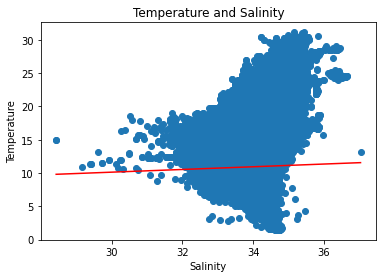

In [112]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# [[x_min], [x_max]] needed for regression line
x_values = [[bottle_df['Salnty'].min()], [bottle_df['Salnty'].max()]]

# Added the MSE to get a better view of the lin reg line
# Otherwise the lin reg line is ~337 units below the data points
predicted_y_values = regression.predict(x_values) + MSE
#print(predicted_y_values)

plt.scatter(bottle_df['Salnty'], bottle_df['T_degC'])
plt.title('Temperature and Salinity')
plt.xlabel('Salinity')
plt.ylabel('Temperature')

plt.plot(x_values,predicted_y_values, 'r-')
plt.show()

**Dig deeper**

The model we built wasn't very good, but we only used one feature. Are there other features or combinations of features that are more predictive of temperature?

Measurements were recorded at different depths. Is salinity a good predictor of temperature at any depth range?

*No, salinity is ok feature but I think we should also have considered different features such as depth, light, and possibly oxygen or some other chemical in the water. More research would have had to have been conducted to get a more accurate model.*

In [113]:
# Your code goes here

---